## Time Series Anomaly Detection Exercises

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from env import get_db_url

In [2]:
query = 'SELECT * FROM logs'
df = pd.read_sql(query, get_db_url('curriculum_logs'))
df.head()

,date,time,path,user_id,cohort_id,ip
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [3]:
df = df[df.cohort_id.isin([33, 34, 51])]
df = df.set_index(pd.to_datetime(df.date + ' ' + df.time))
df.head()

,date,time,path,user_id,cohort_id,ip
2019-07-15 15:39:34,2019-07-15,15:39:34,/,433,33.0,97.105.19.58
2019-07-15 15:39:48,2019-07-15,15:39:48,toc,433,33.0,97.105.19.58
2019-07-15 15:40:29,2019-07-15,15:40:29,quiz,434,33.0,97.105.19.58
2019-07-15 15:40:33,2019-07-15,15:40:33,/,434,33.0,97.105.19.58
2019-07-15 15:40:35,2019-07-15,15:40:35,javascript-i,433,33.0,97.105.19.58


---

<AxesSubplot:>

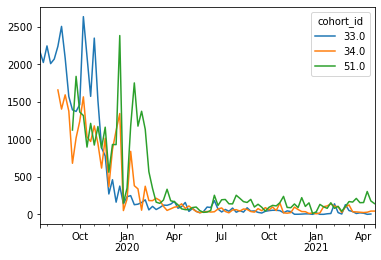

In [4]:
cohort_requests = df.groupby('cohort_id').resample('W').size()
cohort_requests = cohort_requests.unstack(0)
cohort_requests.plot()

Cohort 33 - K=2

In [5]:
K = 2
M = 5
s = cohort_requests.iloc[:,0]
s

2019-07-21    2178.0
2019-07-28    2023.0
2019-08-04    2244.0
2019-08-11    2008.0
2019-08-18    2069.0
               ...  
2021-03-28      20.0
2021-04-04      15.0
2021-04-11       0.0
2021-04-18       4.0
2021-04-25       NaN
Name: 33.0, Length: 93, dtype: float64

In [6]:
bands = pd.DataFrame()
std = s.ewm(span=M).std()
bands['actual'] = s
bands['mid'] = s.ewm(span=M).mean()
bands['upper'] = bands['mid'] + K * std
bands['lower'] = bands['mid'] - K * std
bands.head()

,actual,mid,upper,lower
2019-07-21,2178.0,2178.000000,NaN,NaN
2019-07-28,2023.0,2085.000000,2304.203102,1865.796898
2019-08-04,2244.0,2160.315789,2403.497550,1917.134029
2019-08-11,2008.0,2097.046154,2348.537994,1845.554314
2019-08-18,2069.0,2086.279621,2281.170287,1891.388954


Text(0, 0.5, '# of requests')

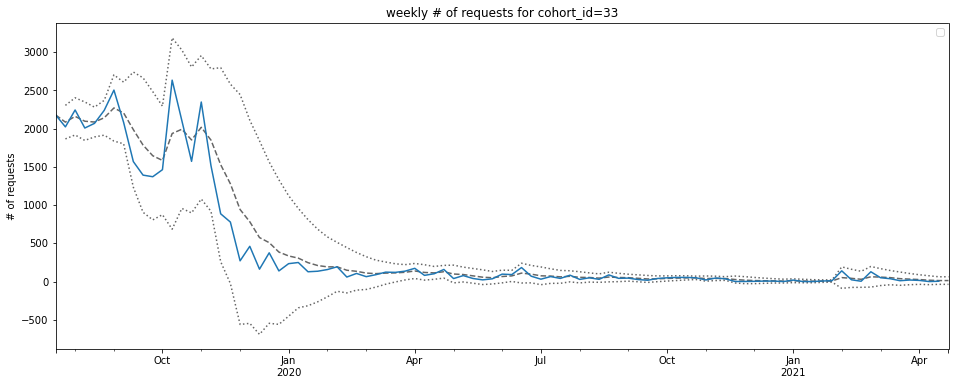

In [7]:
bands[['upper', 'lower']].plot(color='black', alpha=.6, ls=':', figsize=(16, 6))
bands.mid.plot(color='black', alpha=.6, ls='--')
bands.actual.plot()
plt.legend('')
plt.xlabel('')
plt.title('weekly # of requests for cohort_id=33')
plt.ylabel('# of requests')

In [8]:
bands['%b'] = (bands.actual - bands.lower) / (bands.upper - bands.lower)
upper_outliers = bands[bands['%b'] > 1]
lower_outliers = bands[bands['%b'] < 0]
bands.head()

,actual,mid,upper,lower,%b
2019-07-21,2178.0,2178.000000,NaN,NaN,NaN
2019-07-28,2023.0,2085.000000,2304.203102,1865.796898,0.358579
2019-08-04,2244.0,2160.315789,2403.497550,1917.134029,0.672061
2019-08-11,2008.0,2097.046154,2348.537994,1845.554314,0.322964
2019-08-18,2069.0,2086.279621,2281.170287,1891.388954,0.455668


In [11]:
upper_outliers

,actual,mid,upper,lower,%b


In [12]:
lower_outliers

,actual,mid,upper,lower,%b


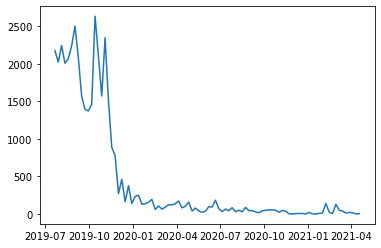

In [13]:
plt.plot(bands.index, bands.actual)
plt.vlines(upper_outliers.index, *plt.ylim(), color='black', ls='--', label='Upper Outlier')

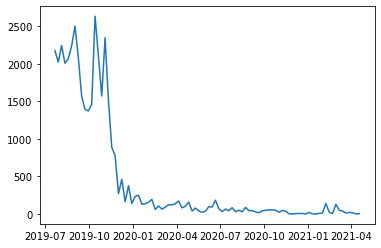

In [14]:
plt.plot(bands.index, bands.actual)
plt.vlines(lower_outliers.index, *plt.ylim(), color='black', ls='--', label='Lower Outlier')

Cohort 33 - K=1

In [32]:
K = 1
M = 5
s = cohort_requests.iloc[:,0]
bands = pd.DataFrame()
std = s.ewm(span=M).std()
bands['actual'] = s
bands['mid'] = s.ewm(span=M).mean()
bands['upper'] = bands['mid'] + K * std
bands['lower'] = bands['mid'] - K * std
bands['%b'] = (bands.actual - bands.lower) / (bands.upper - bands.lower)
upper_outliers = bands[bands['%b'] > 1]
lower_outliers = bands[bands['%b'] < 0]

In [33]:
lower_outliers

,actual,mid,upper,lower,%b
2019-09-15,1569.0,1987.067080,2363.554842,1610.579319,-0.055220
2019-11-17,886.0,1528.532309,2163.071323,893.993295,-0.006299
2020-05-03,39.0,98.542579,156.575528,40.509630,-0.013007
2020-11-01,21.0,39.182114,56.180291,22.183936,-0.034825
2020-11-22,1.0,26.757663,49.374488,4.140838,-0.069436


In [34]:
upper_outliers

,actual,mid,upper,lower,%b
2019-09-01,2504.0,2270.223409,2486.707330,2053.739489,1.039940
2019-10-13,2634.0,1935.948120,2561.527249,1310.368992,1.057925
2020-06-21,183.0,110.402584,175.041872,45.763295,1.061558
2021-02-07,140.0,51.518398,121.727418,-18.690622,1.130130


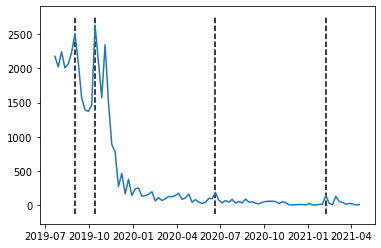

In [35]:
plt.plot(bands.index, bands.actual)
plt.vlines(upper_outliers.index, *plt.ylim(), color='black', ls='--', label='Upper Outlier')

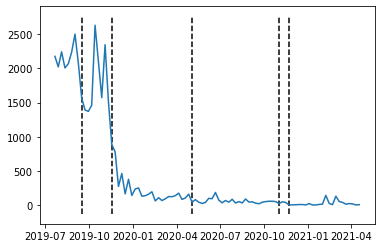

In [36]:
plt.plot(bands.index, bands.actual)
plt.vlines(lower_outliers.index, *plt.ylim(), color='black', ls='--', label='Lower Outlier')

---

Cohort 34 - K=2

In [18]:
x = cohort_requests.iloc[:,1]
x

2019-07-21     NaN
2019-07-28     NaN
2019-08-04     NaN
2019-08-11     NaN
2019-08-18     NaN
              ... 
2021-03-28    28.0
2021-04-04    24.0
2021-04-11    28.0
2021-04-18    43.0
2021-04-25    43.0
Name: 34.0, Length: 93, dtype: float64

In [21]:
bands2 = pd.DataFrame()
std = x.ewm(span=M).std()
bands2['actual'] = x
bands2['mid'] = x.ewm(span=M).mean()
bands2['upper'] = bands2['mid'] + K * std
bands2['lower'] = bands2['mid'] - K * std
bands2.head()

,actual,mid,upper,lower
2019-07-21,NaN,NaN,NaN,NaN
2019-07-28,NaN,NaN,NaN,NaN
2019-08-04,NaN,NaN,NaN,NaN
2019-08-11,NaN,NaN,NaN,NaN
2019-08-18,NaN,NaN,NaN,NaN


<AxesSubplot:>

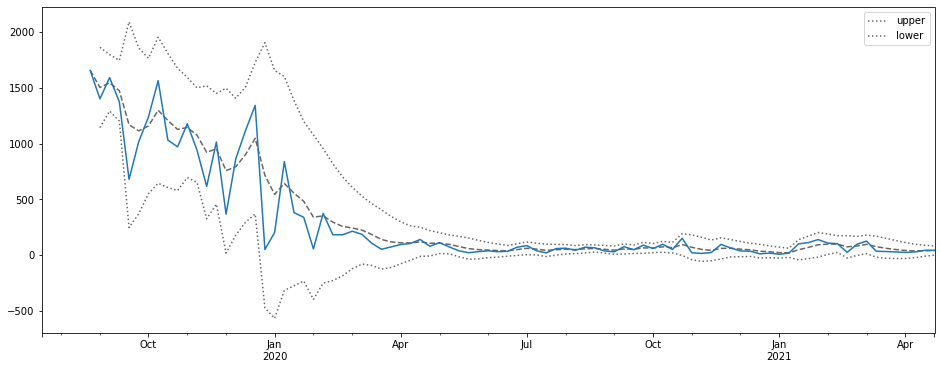

In [22]:
bands2[['upper', 'lower']].plot(color='black', alpha=.6, ls=':', figsize=(16, 6))
bands2.mid.plot(color='black', alpha=.6, ls='--')
bands2.actual.plot()

In [24]:
bands2['%b'] = (bands2.actual - bands2.lower) / (bands2.upper - bands2.lower)
upper_outliers = bands2[bands2['%b'] > 1]
lower_outliers = bands2[bands2['%b'] < 0]
bands2.tail()

,actual,mid,upper,lower,%b
2021-03-28,28.0,49.960591,130.950682,-31.029500,0.364424
2021-04-04,24.0,41.307061,112.873573,-30.259452,0.379084
2021-04-11,28.0,36.871374,96.965164,-23.222417,0.426187
2021-04-18,43.0,38.914249,88.404072,-10.575573,0.541279
2021-04-25,43.0,40.276166,80.913298,-0.360966,0.533514


In [25]:
upper_outliers

,actual,mid,upper,lower,%b


In [26]:
lower_outliers

,actual,mid,upper,lower,%b


Cohort 34 - K=1

In [27]:
K = 1
M = 5
x = cohort_requests.iloc[:,1]
bands2 = pd.DataFrame()
std = x.ewm(span=M).std()
bands2['actual'] = x
bands2['mid'] = x.ewm(span=M).mean()
bands2['upper'] = bands2['mid'] + K * std
bands2['lower'] = bands2['mid'] - K * std
bands2['%b'] = (bands2.actual - bands2.lower) / (bands2.upper - bands2.lower)
upper_outliers = bands2[bands2['%b'] > 1]
lower_outliers = bands2[bands2['%b'] < 0]

In [28]:
lower_outliers

,actual,mid,upper,lower,%b
2019-09-22,680.0,1169.677725,1631.106193,708.249257,-0.030611
2019-11-17,616.0,922.443033,1220.945334,623.940731,-0.013301
2019-12-01,367.0,757.486867,1127.294589,387.679144,-0.027959
2019-12-29,50.0,715.534037,1310.583888,120.484186,-0.059225


In [29]:
upper_outliers

,actual,mid,upper,lower,%b
2020-10-25,151.0,94.423190,143.164413,45.681967,1.080379
2021-01-17,101.0,47.413016,92.909835,1.916196,1.088909


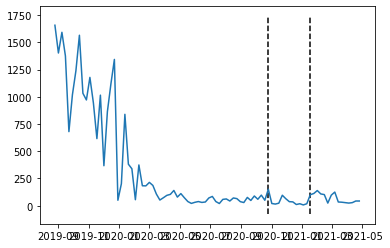

In [30]:
plt.plot(bands2.index, bands2.actual)
plt.vlines(upper_outliers.index, *plt.ylim(), color='black', ls='--', label='Upper Outlier')

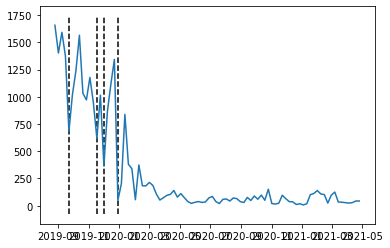

In [31]:
plt.plot(bands2.index, bands2.actual)
plt.vlines(lower_outliers.index, *plt.ylim(), color='black', ls='--', label='Lower Outlier')

---

Cohort 51 - K=2

In [38]:
K = 2
M = 5
y = cohort_requests.iloc[:,2]
bands3 = pd.DataFrame()
std = y.ewm(span=M).std()
bands3['actual'] = y
bands3['mid'] = y.ewm(span=M).mean()
bands3['upper'] = bands3['mid'] + K * std
bands3['lower'] = bands3['mid'] - K * std
bands3['%b'] = (bands3.actual - bands3.lower) / (bands3.upper - bands3.lower)
upper_outliers = bands3[bands3['%b'] > 1]
lower_outliers = bands3[bands3['%b'] < 0]
bands3.tail()

,actual,mid,upper,lower,%b
2021-03-28,155.0,157.355631,252.982137,61.729124,0.487683
2021-04-04,157.0,157.237087,235.316703,79.157472,0.498482
2021-04-11,304.0,206.158058,373.480795,38.835322,0.792375
2021-04-18,178.0,196.772039,336.577519,56.966558,0.432864
2021-04-25,143.0,178.848026,306.296384,51.399668,0.359363


In [39]:
lower_outliers

,actual,mid,upper,lower,%b


In [40]:
upper_outliers

,actual,mid,upper,lower,%b


Cohort 51 - K=1

In [41]:
K = 1
M = 5
y = cohort_requests.iloc[:,2]
bands3 = pd.DataFrame()
std = y.ewm(span=M).std()
bands3['actual'] = y
bands3['mid'] = y.ewm(span=M).mean()
bands3['upper'] = bands3['mid'] + K * std
bands3['lower'] = bands3['mid'] - K * std
bands3['%b'] = (bands3.actual - bands3.lower) / (bands3.upper - bands3.lower)
upper_outliers = bands3[bands3['%b'] > 1]
lower_outliers = bands3[bands3['%b'] < 0]
bands3.tail()

,actual,mid,upper,lower,%b
2021-03-28,155.0,157.355631,205.168884,109.542378,0.475366
2021-04-04,157.0,157.237087,196.276895,118.197279,0.496964
2021-04-11,304.0,206.158058,289.819426,122.496690,1.084750
2021-04-18,178.0,196.772039,266.674779,126.869298,0.365727
2021-04-25,143.0,178.848026,242.572205,115.123847,0.218725


<AxesSubplot:>

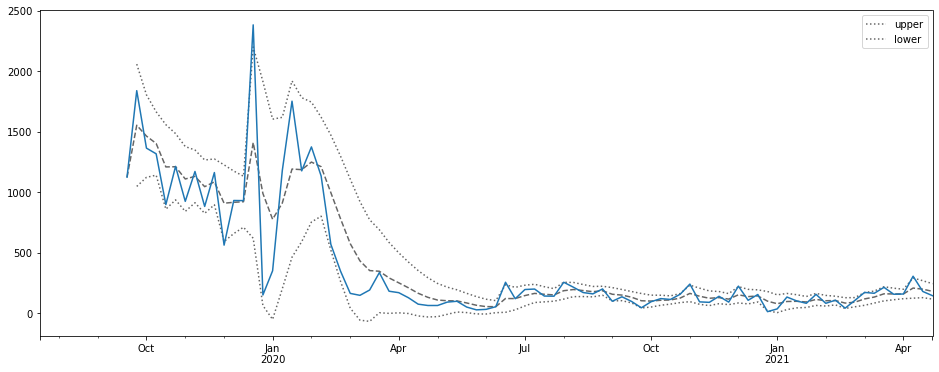

In [46]:
bands3[['upper', 'lower']].plot(color='black', alpha=.6, ls=':', figsize=(16, 6))
bands3.mid.plot(color='black', alpha=.6, ls='--')
bands3.actual.plot()

In [42]:
lower_outliers

,actual,mid,upper,lower,%b
2019-12-01,561.0,907.592362,1224.659328,590.525396,-0.046560
2020-09-06,97.0,154.949786,209.895400,100.004172,-0.027338
2020-12-27,11.0,97.819149,177.690747,17.947551,-0.043492


In [43]:
upper_outliers

,actual,mid,upper,lower,%b
2019-12-22,2382.0,1408.855548,2199.729783,617.981314,1.115233
2020-06-21,254.0,119.612658,233.396961,5.828354,1.090536
2020-08-02,254.0,184.306187,253.772602,114.839772,1.001637
2020-11-01,239.0,161.907963,230.081717,93.734209,1.065408
2020-12-06,222.0,150.514629,218.139736,82.889522,1.028542
2021-03-07,170.0,116.200254,168.843475,63.557033,1.010985
2021-04-11,304.0,206.158058,289.819426,122.496690,1.084750


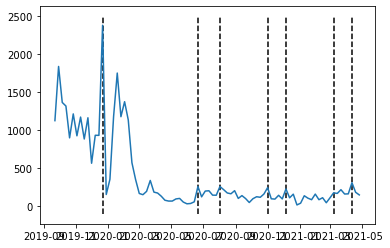

In [44]:
plt.plot(bands3.index, bands3.actual)
plt.vlines(upper_outliers.index, *plt.ylim(), color='black', ls='--', label='Upper Outlier')

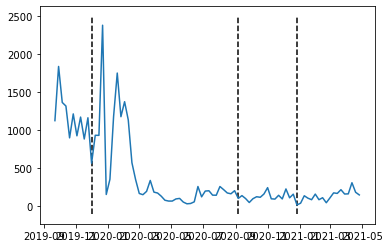

In [45]:
plt.plot(bands3.index, bands3.actual)
plt.vlines(lower_outliers.index, *plt.ylim(), color='black', ls='--', label='Lower Outlier')